# British Airways - Virtual Experience Program

**Task 2: Predicting customer buying behaviour**


---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Domain Analysis
To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

## 1. Set-up & EDA

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

## 2. Data Preprocessing

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

### Creating a New Feature

- We will make a feature `is_weekend` to represent a holiday with 1 for Saturday or Sunday and 0 for rest of the days.
- Since we want to predict customer behaviour on the holidays, this new feature will be useful.

In [9]:
is_weekend = []

for i in range(len(df)):
    if df['flight_day'][i] == 6 or df['flight_day'][i] == 7:
        is_weekend.append(1)
    else:
        is_weekend.append(0)

df['is_weekend'] = is_weekend
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0


In [26]:
# Grouping columns
weekend = df.groupby('is_weekend')['num_passengers'].sum().reset_index()
weekend

,is_weekend,num_passengers
0,0,59333
1,1,20229


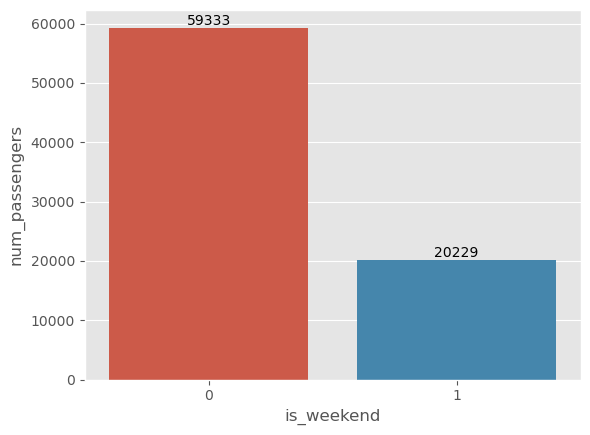

In [22]:
# Plotting grouped columns
ax = sns.barplot(data = weekend, x= 'is_weekend', y= 'num_passengers')
ax.bar_label(ax.containers[0])
plt.show()

Average Passengers per day:

In [25]:
# Grouping columns
dayperday = df.groupby('flight_day')['num_passengers'].mean().reset_index()
dayperday

,flight_day,num_passengers
0,1,1.596273
1,2,1.571093
2,3,1.579098
3,4,1.575835
4,5,1.557166
5,6,1.615107
6,7,1.654257


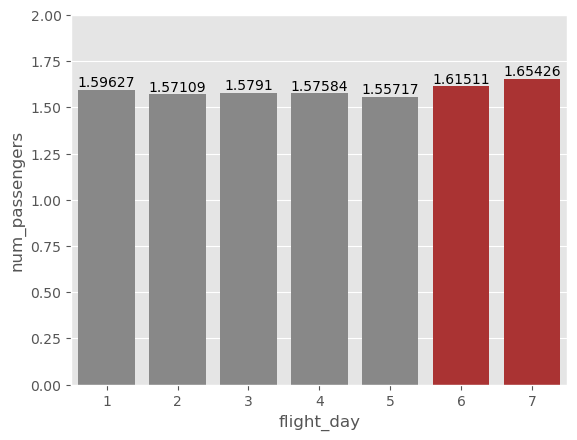

In [24]:
# Plotting grouped columns
ax = sns.barplot(data = dayperday, x= 'flight_day', y= 'num_passengers')
for bar in ax.patches:
    bar.set_facecolor('#888888')
    
ax.bar_label(ax.containers[0])
plt.ylim(0,2)
ax.patches[5].set_facecolor('#aa3333')
ax.patches[6].set_facecolor('#aa3333')
plt.show()

As we can see from the two graphs above, on weekends the number of passengers is less than on weekdays, but if we look at the average number of passengers, weekends have a higher value than weekdays, so it is suggested that we need see the number of flights from day to day.

In [27]:
df['flight_day'].value_counts().reset_index().sort_values(by='index')

,index,flight_day
0,1,8102
2,2,7673
1,3,7674
3,4,7424
4,5,6761
6,6,5812
5,7,6554


From the table above, we can see that weekends have fewer flights than weekdays, so we need to consider adding flight schedules on weekends. but to be effective we need to see what routes have schedules on weekends with the most passengers.

In [28]:
route = df[df['is_weekend'] == 1].groupby('route').agg({'num_passengers' : 'sum'}).reset_index().sort_values(by='num_passengers', ascending=False)


In [29]:
route[:5]

,route,num_passengers
4,AKLKUL,1284
243,DMKKIX,462
606,PENTPE,396
375,ICNSIN,311
538,MELSGN,306


From the table above we can see the top 5 routes that have the most passengers, so my recommendation is that we increase the number of flights to these five routes on weekends.

## 4. Feature Engineering

We can drop a categorical column that has too many unique values

In [30]:
df['route'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

As we can see, route have 799 unique value and that is to big, so we can delete route column

In [31]:
df.drop('route',axis=1, inplace=True)

In [32]:
df['booking_origin'].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

The booking origin column also has many unique values, but because I don't want to delete the information on the origin of the booking, I will change the value of the booking origin, which initially contains the name of the country to the name of the continent.

In [34]:
!pip install pycountry_convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 12.0 MB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for pytest-mock>=1.6.3 from https://files.pythonhosted.org/packages/da/85/80ae98e019a429445bfb74e153d4cb47c3695e3e908515e95e95c18237e5/pytest_mock-3.11.1-py3-none-any.whl.metadata
  Obtaining dependency information for pytest-cov>=2.5.1 from https://files.pythonhosted.org/packages/a7/4b/8b78d126e275efa2379b1c2e09dc52cf70df16fc3b90613ef82531499d73/pytest_cov-4.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for coverage[toml]>=5.2.1 from https://files.pythonhosted.org/packages/20/b6/e911ced41c17b7d53bb31aa695e7c24917a87d5e66bb4c640de015802a3f/coverage-7.3.1-cp39-cp39-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 11.7 MB/s eta 0:00:00
  Created wheel for pycountry: filena

In [35]:
import pycountry_convert as pc

continent = []
index = []

df['booking_origin'] =  df['booking_origin'].replace('Myanmar (Burma)', 'Myanmar')

for i in range(len(df)):
    country = df['booking_origin'][i]
    #print(country)
    try :
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        continent.append(continent_name)
    except:
        continent.append('Others')

df['booking_continent'] = continent


In [36]:
df['booking_continent'].value_counts()

AS        29740
OC        18960
EU          578
NA          525
Others       87
AF           69
SA           41
Name: booking_continent, dtype: int64

Now we have less unique value to represent booking origin.

In [37]:
df.drop('booking_origin',axis=1, inplace=True)

### Data Cleaning


In [38]:
df.sample(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent
44524,1,Mobile,RoundTrip,278,6,1,5,0,0,0,7.00,1,0,AS
19842,1,Internet,RoundTrip,28,50,23,2,1,0,0,8.83,0,0,OC
10330,1,Internet,RoundTrip,82,18,10,2,1,0,1,8.58,0,0,OC
46315,1,Internet,RoundTrip,114,6,7,1,1,1,0,8.83,0,0,OC
31508,4,Internet,RoundTrip,142,4,8,2,1,0,0,5.33,0,0,AS
29724,1,Mobile,RoundTrip,117,4,14,7,0,1,1,4.67,0,1,AS
49151,2,Internet,RoundTrip,55,6,7,7,0,0,0,5.62,0,1,OC
14195,1,Internet,RoundTrip,47,36,20,3,1,0,1,6.62,0,0,AS
16212,1,Internet,RoundTrip,1,29,10,1,1,0,0,6.42,0,0,AS
20797,1,Internet,RoundTrip,97,21,17,6,1,0,1,8.83,1,1,AS


Let's see outliers on numeric column:

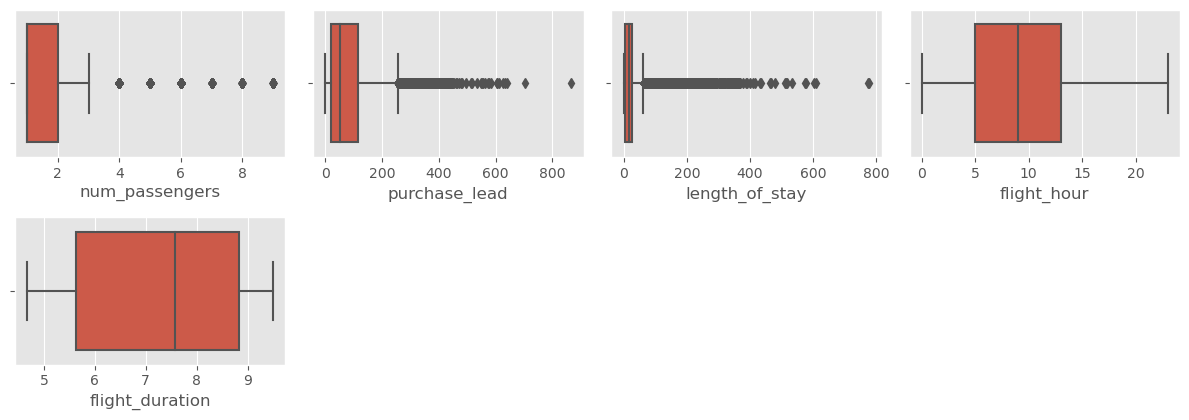

In [39]:
num = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(data=df[num], x=df[column])
    plt.tight_layout()

As we can see, on purchase lead and length of stay have a lot of outlier values, so we will delete outlier wtih z-score so that not many columns are wasted.

In [40]:
from scipy import stats
import numpy as np

print(f'Total rows before delete outlier : {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in num:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    df = df[filtered_entries]
    
print(f'Total rows after delete outlier : {len(df)}')

Total rows before delete outlier : 50000
Total rows after delete outlier : 47115


/var/folders/5p/vjz687ws6v96nrdfcjm9j2s00000gn/T/ipykernel_7322/1639804563.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]
/var/folders/5p/vjz687ws6v96nrdfcjm9j2s00000gn/T/ipykernel_7322/1639804563.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]
/var/folders/5p/vjz687ws6v96nrdfcjm9j2s00000gn/T/ipykernel_7322/1639804563.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]
/var/folders/5p/vjz687ws6v96nrdfcjm9j2s00000gn/T/ipykernel_7322/1639804563.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]


### Feature Transformation

Now let's look at the distribution of numerical data.

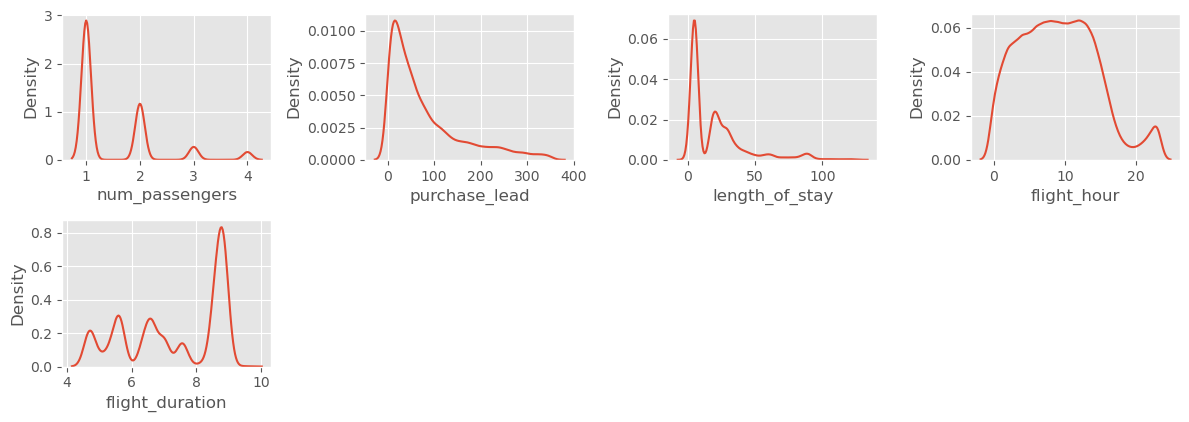

In [41]:
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.kdeplot(data=df[num], x=df[column])
    plt.tight_layout()

It doesn't have a normal distribution, so let's perform a feature transformation to fix it so that the machine learning model has better results.

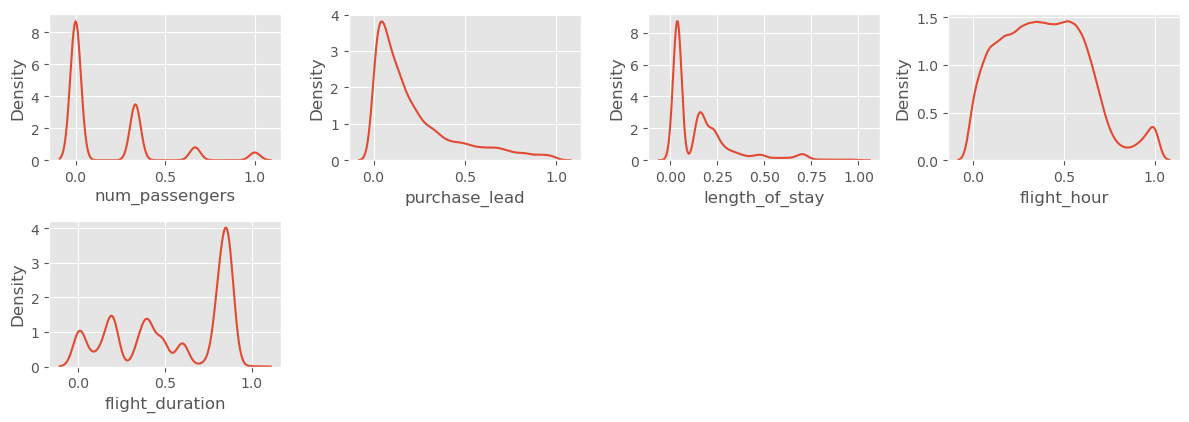

In [42]:
from sklearn.preprocessing import Normalizer

num_max = df[num].max()
num_min = df[num].min()

num_features = (df[num] - num_min) / (num_max - num_min)
num_features.head()

df[num] = num_features

plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.kdeplot(data=df, x=df[column])
    plt.tight_layout()

Now our numerical data have a better distribution than before feature transformation.

### Feature Encoding

In [43]:
from sklearn import preprocessing

label_encode = ['sales_channel']
one_hot = ['booking_continent']
                
mapping_trip_type = {
    'RoundTrip'  : 0,
    'OneWay'     : 1,
    'CircleTrip' : 2
}               

df['trip_type'] = df['trip_type'].map(mapping_trip_type)

df['sales_channel'] = preprocessing.LabelEncoder().fit_transform(df['sales_channel'])

onehots = pd.get_dummies(df['booking_continent'], prefix='booking_continent')
df = df.join(onehots)

df.drop('booking_continent', axis=1, inplace=True)

In [44]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent_AF,booking_continent_AS,booking_continent_EU,booking_continent_NA,booking_continent_OC,booking_continent_Others,booking_continent_SA
0,0.333333,0,0,0.742210,0.150794,0.304348,6,1,0,0,0.175983,0,1,0,0,0,0,1,0,0
1,0.000000,0,0,0.317280,0.158730,0.130435,6,0,0,0,0.175983,0,1,0,0,0,0,1,0,0
2,0.333333,0,0,0.688385,0.174603,0.739130,3,1,1,0,0.175983,0,0,0,1,0,0,0,0,0
3,0.000000,0,0,0.271955,0.246032,0.173913,6,0,0,1,0.175983,0,1,0,0,0,0,1,0,0
4,0.333333,0,0,0.192635,0.174603,0.652174,3,1,0,1,0.175983,0,0,0,1,0,0,0,0,0


### Train-Test Split

In [45]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['booking_complete'], axis=1)
y = df['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
y_train.value_counts(normalize=True)

0    0.851136
1    0.148864
Name: booking_complete, dtype: float64

We have Imbalanced data, so we need to balance it with sampling methods.

### Sampling the Data (Oversampling)

In [48]:
!pip install imblearn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [49]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
x_over, y_over = sm.fit_resample(x_train, y_train.ravel())

## 5. Machine Learning Modelling

### Training a few models:

In [54]:
# Importing important models:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [55]:
%%time

# A List to store the Accuracy Scores
MLA = [] 

# A list of Algorithms to pass into a function:
Z = [LinearSVC() , 
     DecisionTreeClassifier() ,
     LogisticRegression(max_iter=10000) , 
     GaussianNB() , 
     RandomForestClassifier() , 
     GradientBoostingClassifier(), 
     KNeighborsClassifier()]

# A list of names for each Algorithm:
Q = ["LinearSVC" , 
     "DecisionTreeClassifier" , 
     "LogisticRegression" , 
     "GaussianNB" , 
     "RandomForestClassifier" , 
     "GradientBoostingClassifier", 
     'KNNeighborsClassifier']

# Defining a function to Train and Predict on multiple Algorithms:
for i in range(0,len(Z)):
    model = Z[i]
    model.fit( x_over , y_over )
    pred = model.predict(x_test)
    MLA.append(accuracy_score(pred, y_test))
    

/Users/bhushan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/bhushan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


CPU times: user 48 s, sys: 22.4 s, total: 1min 10s
Wall time: 42.7 s


In [56]:
# Creating a Dictionary:
d = { "Algorithm" : Q, "Model Accuracy" : MLA }

# Creating a DataFrame from the Dictionary:
dfm = pd.DataFrame(d)
dfm


,Algorithm,Model Accuracy
0,LinearSVC,0.577948
1,DecisionTreeClassifier,0.752520
2,LogisticRegression,0.587074
3,GaussianNB,0.303407
4,RandomForestClassifier,0.816619
5,GradientBoostingClassifier,0.787011
6,KNNeighborsClassifier,0.652234


### Voting Classifier

In [57]:
models=[]

models.append(("KNN",KNeighborsClassifier()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Random Forest",RandomForestClassifier()))

In [58]:
from sklearn.ensemble import VotingClassifier

vt = VotingClassifier(estimators=models, voting='hard')
vt.fit(x_over,y_over)
y_pred = vt.predict(x_test)

/Users/bhushan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bhushan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7995
           1       0.30      0.25      0.27      1428

    accuracy                           0.80      9423
   macro avg       0.59      0.57      0.58      9423
weighted avg       0.78      0.80      0.79      9423



### Random Forest Classifier

In [79]:
rf = RandomForestClassifier(random_state=4)

rf.fit(x_over,y_over)
y_pred = rf.predict(x_test)

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7995
           1       0.31      0.18      0.23      1428

    accuracy                           0.82      9423
   macro avg       0.59      0.56      0.56      9423
weighted avg       0.78      0.82      0.79      9423



### Feature Importance

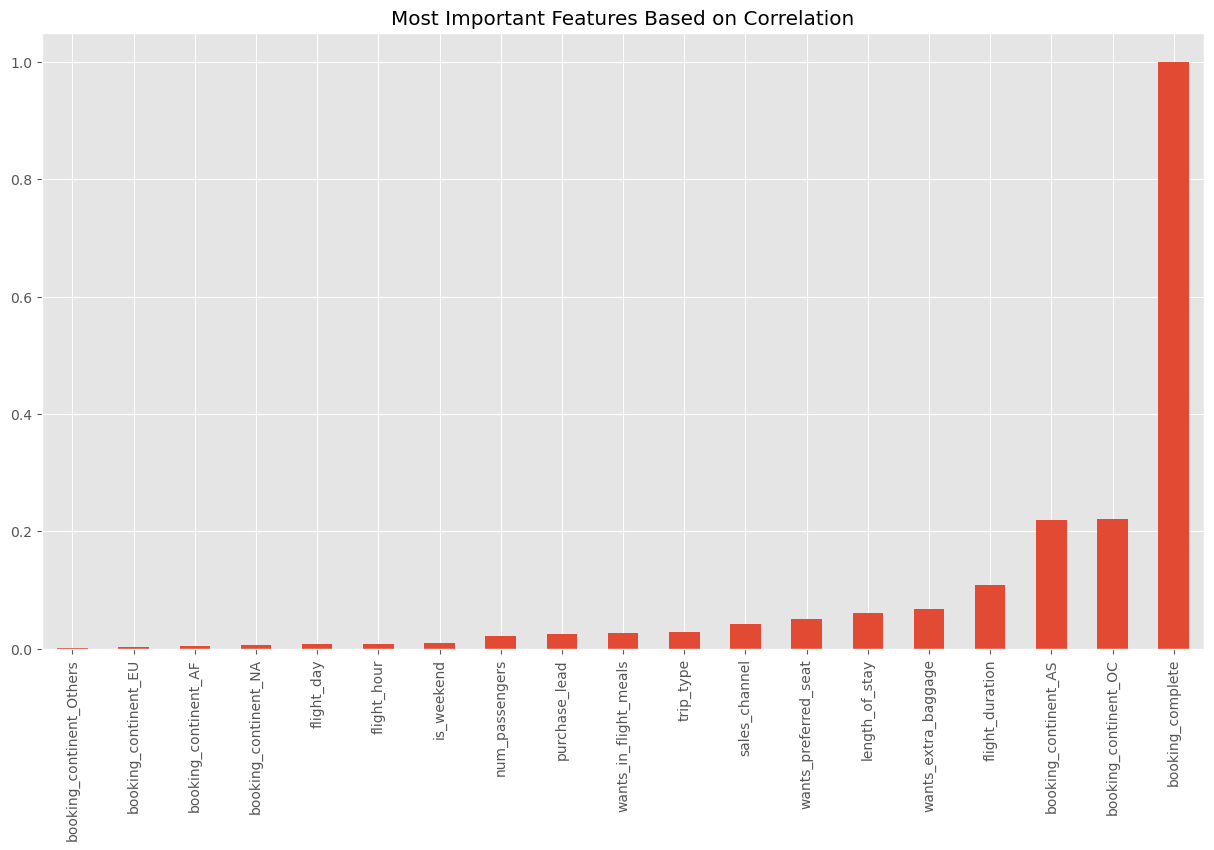

In [85]:
# Plotting Important correlations after removing outliers:

plt.figure(figsize=(15,8))
d = df.corr()['booking_complete'][:-1].abs().sort_values().plot(kind='bar', title='Most Important Features Based on Correlation')

plt.show()

In [90]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

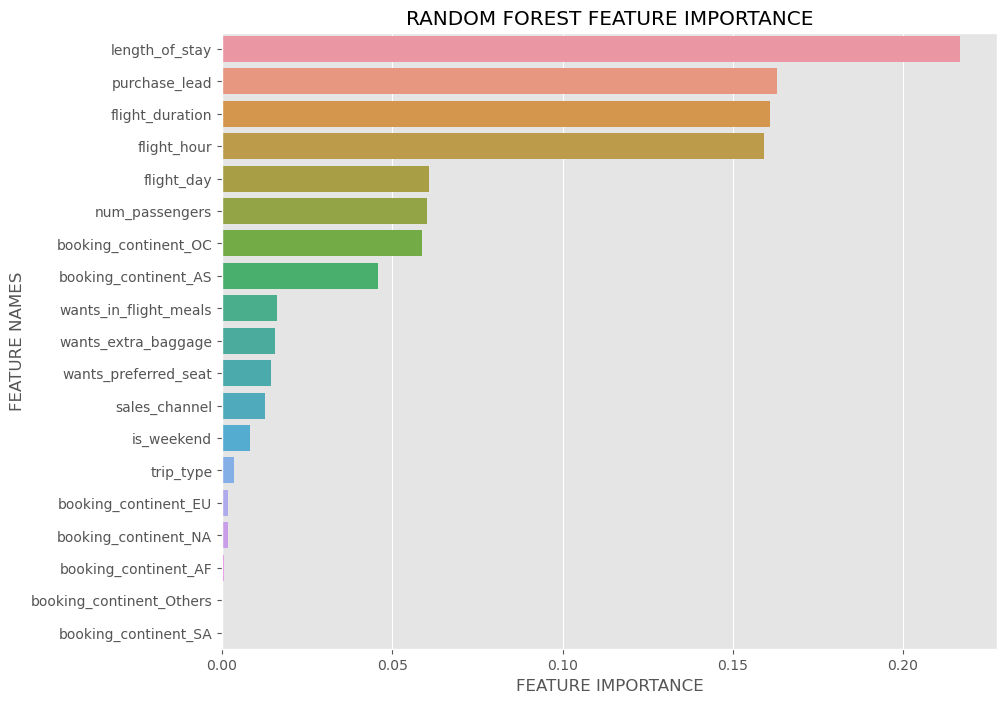

In [91]:
plot_feature_importance(rf.feature_importances_, x_over.columns,'RANDOM FOREST')


## 5. Conclusion

- From the Feature Importance Plot, we see that `Length of Stay` and `Purchase Lead` are the 2 most important features.
- We need to add more flights on Weekends.
- More Flights can be added to these routes: AKLKUL, DMKKIX, PENTPE, ICNSIN, MELSGN